# **MATH&ML-2. Линейная алгебра в контексте линейных методов. Часть II**

# 1. Введение

✍ Рады приветствовать вас во втором модуле, посвящённом линейной алгебре!

В предыдущем модуле мы познакомились с базовыми понятиями линейной алгебры. По сути, мы изучили основы матричного языка и теперь можем на нем говорить. 

В этом модуле мы перейдём к применению линейной алгебры в машинном обучении и рассмотрим **алгоритмы анализа данных** с разных сторон. В основном мы, конечно, будем говорить о модели линейной регрессии и её модификациях.

Мы будем использовать весь математический аппарат, который изучили в прошлом модуле. Темы предстоят очень интересные, но в то же время непростые. Для того чтобы усвоить их, необходимо владеть всеми навыками, приобретёнными в предыдущем модуле — от базовых операций над векторами до знания принципов решения СЛАУ. Давайте проверим, насколько вы готовы ↓

### Задание 1.1

Найдите скалярное произведение векторов:

$\vec{v_{1}}  = (-1, 2, \ -7, 9)^T$

$\vec{v_{2}}  = (2, 8, 2, \ -1)^T$

In [359]:
import numpy as np

np.array([-1, 2, -7, 9])@np.array([2, 8, 2, -1])

-9

In [360]:
np.array([[1, 1], [1, 2]])@np.array([[1, 1], [1, 2]])

array([[2, 3],
       [3, 5]])

### Задание 1.4

Задана матрица

![](https://lms.skillfactory.ru/assets/courseware/v1/c1579bdd2592b86d75c9413c69d0627d/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_1_1.png)

Найдите матрицу Грама $(A^{T}A)$.

In [361]:
A = np.array([[1, 1], [1, 2]])
print('(A^T)*A: \n', A.T@A)


(A^T)*A: 
 [[2 3]
 [3 5]]


### Задание 1.6

Вычислите обратную матрицу $A^{-1}$, если:

![](https://lms.skillfactory.ru/assets/courseware/v1/e9a41d606d7dcf555779b45d871b27ce/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_1_4.png)

In [362]:
A = np.array([[1, 2], [3, 7]])
np.linalg.inv(A)

array([[ 7., -2.],
       [-3.,  1.]])

### Задание 1.7

Найдите ранг матрицы системы, составленной из векторов:

$\vec{v_{1}}  = (2, 10, \ -2)^T$

$\vec{v_{2}}  = (3, 2, \ -2)^T$

$\vec{v_{3}}  = (8, 14, \ -6)^T$

In [363]:
v1 = np.array([2, 10, -2])
v2 = np.array([3, 2, -2])
v3 = np.array([8, 14, -6])

A = np.array([v1, v2, v3]).T
np.linalg.matrix_rank(A)

2

**В первой части** мы будем говорить о **классической модели линейной регрессии**. Для этого мы вернёмся к неоднородным системам линейных алгебраических уравнений, которые мы затронули в прошлом модуле, и посмотрим, как они связаны с **методом наименьших квадратов** (МНК, или OLS, Ordinary Least Squares). Затем мы с математической точки зрения посмотрим на проблемы, которые возникают при его использовании, например мультиколлинеарность или чересчур большое количество факторов.

**Во второй части** мы перейдём к модификациям модели линейной регрессии и посмотрим, как линейная алгебра работает в **полиномиальной регрессии**, а также поговорим о том, как работают методы регуляризации на математическом уровне.

В конце каждого из блоков нас ожидает небольшая **практическая задача** на применение регрессионных моделей.

Сразу отметим, что **мы не будем рассматривать следующие вопросы**:

* Вероятностные предпосылки использования модели линейной регрессии, необходимые для её валидности (данные предпосылки регламентирует теорема Маркова-Гаусса).
* Оценки качества полученной регрессионной модели и оценки статистической значимости её коэффициентов.
* Статистические методы предварительной обработки данных.

Для изучения этих вопросов понадобятся знания в области теории вероятности и статистики. Мы обязательно обсудим их в следующих модулях. А пока нас интересуют подробности построения вычислительных алгоритмов с точки зрения линейной алгебры.

* Также мы не будем затрагивать тему корректной валидации моделей и разделять выборку на тренировочную/тестовую/валидационную с целью экономии времени и сил. Надеемся, что вы помните, как правильно оценивать качество получаемых моделей, сможете проделать это самостоятельно.

Таким образом, мы будем рассматривать **только математическую составляющую** линейных (и полиномиальных) моделей регрессии, не концентрируясь на сторонних аспектах машинного обучения.

## ЦЕЛИ ДАННОГО МОДУЛЯ:

* познакомиться с неоднородными СЛАУ и случаями их решений;
* изучить математическую формализацию метода наименьших квадратов;
* научиться строить модель линейной регрессии с помощью МНК;
* понять, какие проблемы возникают в МНК с математической точки зрения;
* познакомиться с математической формализацией полиномиальной регрессии;
* рассмотреть методы регуляризации и принципы их работы.

# 2. Неоднородные СЛАУ

✍ Мы начнём с **алгоритма классической линейной регрессии по методу наименьших квадратов** (OLS, Ordinary Least Squares). Данный алгоритм является базовым, но, тем не менее, весьма непрост для восприятия, поэтому данная сложносочинённая задача будет разделена на две части:

* В этом юните мы обсудим случаи и алгоритм решения неоднородных СЛАУ.
* В следующем юните подведём под эту задачу контекст задачи регрессии.

Для начала давайте вспомним, что такое **неоднородные СЛАУ**.

**Примечание**. Совокупность уравнений первой степени, в которых каждая переменная и коэффициенты в ней являются вещественными числами, называется **системой линейных алгебраических уравнений** (**СЛАУ**) и в общем случае записывается как:

$$\left\{ \begin{array}{c} a_{11}x_1+a_{12}x_2+\dots +a_{1m}x_m=b_1 \\ a_{21}x_1+a_{22}x_2+\dots +a_{2m}x_m=b_2 \\ \dots \\ a_{n1}x_1+a_{n2}x_2+\dots +a_{nm}x_m=b_n \end{array} \right.\ (1),$$

где

* $n$ — количество уравнений;
* $m$ — количество переменных;
* $x_i$ — неизвестные переменные системы;
* $a_{ij}$ — коэффициенты системы;
* $b_i$ — свободные члены системы.

CЛАУ (1) называется **однородной**, если все свободные члены системы равны 0 ($b_1=b_2=⋯=b_n=0$):

$$\textrm{С}\textrm{Л}\textrm{А}\textrm{У}-\textrm{о}\textrm{д}\textrm{н}\textrm{о}\textrm{р}\textrm{о}\textrm{д}\textrm{н}\textrm{а}\textrm{я},\ \textrm{е}\textrm{с}\textrm{л}\textrm{и}\ \forall b_i=0$$

СЛАУ (1) называется **неоднородной**, если хотя бы один из свободных членов системы отличен от 0:

$$\textrm{С}\textrm{Л}\textrm{А}\textrm{У}-\textrm{н}\textrm{е}\textrm{о}\textrm{д}\textrm{н}\textrm{о}\textrm{р}\textrm{о}\textrm{д}\textrm{н}\textrm{а}\textrm{я},\ \textrm{е}\textrm{с}\textrm{л}\textrm{и}\ \exists b_i\neq 0$$

Пример неоднородной СЛАУ:

$\left\{\begin{array}{c} w_{1}+w_{2}=1 \\ w_{1}+2 w_{2}=2 \end{array}\right.$

Вспомним, что СЛАУ можно записать в матричном виде:

![](https://lms.skillfactory.ru/assets/courseware/v1/35808bc9ca767f3c996106d8887c1108/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_2_3.png)

где $A$ — матрица системы, $\omega$ — вектор неизвестных коэффициентов, а $b$ — вектор свободных членов. 

Давайте введём новое для нас определение.

> Р**асширенной матрицей системы $A|b$ неоднородных СЛАУ** называется матрица, составленная из исходной матрицы и вектора свободных коэффициентов:
>
> $$(A \mid \vec{b})=\left(\begin{array}{cccc|c} a_{11} & a_{12} & \ldots & a_{1 m} & b_{1} \\ a_{21} & a_{22} & \ldots & a_{2 m} & b_{2} \\ \ldots & \ldots & \ldots & \ldots & \ldots \\ a_{n 1} & a_{n 2} & \ldots & a_{n m} & b_{n} \end{array}\right)$$

Расширенная матрица системы — это обычная матрица. Черта, отделяющая коэффициенты $a_{ij}$ от свободных членов $b_i$ — чисто символическая. 

Над расширенной матрицей неоднородной СЛАУ можно производить те же самые действия, что и над обычной, а именно:

* складывать/вычитать между собой строки/столбцы матрицы;
* умножать строки/столбцы на константу;
* менять строки/столбцы местами.

Приведём пример расширенной матрицы системы. Пусть исходная система будет следующей:

$\left\{\begin{array}{c} w_{1}+w_{2}=1 \\ w_{1}+2 w_{2}=2 \end{array}\right.$

Запишем её в матричном виде:

![](https://lms.skillfactory.ru/assets/courseware/v1/f928ba511cc7a2ac62881707fdfeea66/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_2_6.png)

Тогда расширенная матрица системы будет иметь вид:

![](https://lms.skillfactory.ru/assets/courseware/v1/f534ccbdd7c85b138e033bbb178a520b/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_2_7.png)

еперь, когда мы вспомнили все определения и познакомились с термином расширенной матрицы, мы можем переходить к решению неоднородных СЛАУ.

Существует три случая при решении неоднородных СЛАУ:

* «Идеальная пара»

    Это так называемые определённые системы линейных уравнений, имеющие единственные решения.

* «В активном поиске»

    Неопределённые системы, имеющие бесконечно много решений.

* «Всё сложно»

    Это самый интересный для нас случай — переопределённые системы, которые не имеют точных решений.

**Примечание**. В данной классификации неоднородных СЛАУ допущено упрощение в терминологии. На самом деле неопределённые системы — это те, в которых независимых уравнений меньше, чем неизвестных. Они могут иметь бесконечно много решений (быть совместными) или ни одного решения (быть несовместными, если уравнения противоречат друг другу).

На практике, например в обучении регрессий, этот случай практически не встречается.

Что касается переопределённых систем, то в них, помимо несовместности (отсутствия решений), количество независимых уравнений превышает количество неизвестных — это тот самый случай, что мы видим в регрессионном анализе.

Далее мы рассмотрим каждый из случаев на примере.

## СЛУЧАЙ «ИДЕАЛЬНАЯ ПАРА»

> Самый простой случай решения неоднородной СЛАУ — когда система имеет единственное решение. Такие системы называются **совместными**.

На вопрос о том, когда СЛАУ является совместной, отвечает главная теорема СЛАУ — **теорема Кронекера — Капелли** (также её называют **критерием совместности системы**).

> **Теорема Кронекера — Капелли:**
> 
> Неоднородная система линейный алгебраических уравнений $A \vec{w} = \vec{b}$ является совместной тогда и только тогда, когда ранг матрицы системы $A$ **равен** рангу расширенной матрицы системы $(A| \vec{b})$ и равен количеству независимых переменных $m$:
> 
> $$rk(A) = rk(\vec{b}) = m \leftrightarrow \exists ! \vec{w} = (w_{1}, w_{2}, \ldots w_m)^T$$
>
> Причём решение системы будет равно:
> 
> $$\vec{w} = A^{-1} \vec{b}$$


**Примечание**. Здесь значок $\exists !$ переводится как «существует и причём единственное».

Сложно и непонятно? Давайте разберёмся, как работает эта теорема, на примерах ↓

*Дана СЛАУ:*

![](https://lms.skillfactory.ru/assets/courseware/v1/cadd1684cd0b6d152ce5a1a784fc8973/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_2_8.png)

*где $w_1$ и $w_2$ — неизвестные переменные.*

При решении системы «в лоб» получим:

![](https://lms.skillfactory.ru/assets/courseware/v1/37c7d45c0a88651cd57dd05b085adb78/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_2_9.png)

Интерпретация:

![](https://lms.skillfactory.ru/assets/courseware/v1/5191ad698399cde0da309f8deea15cb6/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_2_10.png)

На языке линейной алгебры это означает что вектор $(1,2)^T$ линейно выражается через векторы коэффициентов системы $(1,1)^T$ и $(1,2)^T$.

В матричном виде система запишется, как:

![](https://lms.skillfactory.ru/assets/courseware/v1/a1e86f40406ca7904279ac19a60844b0/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_2_11.png)

Преобразование уравнений будем таким же, как и при преобразовании расширенной матрицы системы $(A|\vec{b})$, вычитая сначала первую строку из второй, а затем — результат из первой, получим то же решение, что и решение «в лоб».

![](https://lms.skillfactory.ru/assets/courseware/v1/d0df10f19deeb809ba7cbf27264f85a9/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_2_12.png)

Других решений у системы нет. 

Посмотрим на ранги матрицы $A$ и расширенной матрицы $(A|\vec{b})$ (количество ступеней в ступенчатых матрицах):

![](https://lms.skillfactory.ru/assets/courseware/v1/da90d08d05f922039ad20d58aa5aff45/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_2_13.png)

Они совпадают и равны количеству неизвестных, а это и гарантирует существование и единственность решения. То есть в общем случае, чтобы узнать, сколько решений существует у системы, её необязательно было бы решать — достаточно было бы найти ранги матриц $A$ и $A|b$.

Тут возникает вопрос: «Можно ли найти решение одной формулой?»

Для удобства перепишем систему без стрелок:

$Aw = b$

Так как матрица квадратная и невырожденная, у неё обязательно есть обратная матрица.

Умножим на $A^{-1}$ слева обе части уравнения. Стоит напомнить, что произведение матриц не перестановочно, поэтому есть разница, с какой стороны умножать.

$$A^{-1} Aw = A^{-1}b$$

$$w = A^{-1} b$$


**Важно**! Отсюда явно видны **ограничения** этого метода: его можно применять только для квадратных невырожденных матриц (тех, у которых определитель не равен 0).

Убедимся в правильности формулы. Найдём произведение матрицы $A^{-1}$ и вектора-столбца $b$:

![](https://lms.skillfactory.ru/assets/courseware/v1/207d07ac7518f16e548924a9bc2e3382/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_2_14.png)

Меняем местами главную диагональ и меняем знаки у побочной. Как видим, результат совпал с прошлым методом.

**Резюмируем ↓**

У нас есть квадратная система с $m$ неизвестных. Если ранг матрицы коэффициентов $A$ **равен** рангу расширенной матрицы $(A|b)$ и **равен** количеству переменных ($rk(A)=rk(\vec{b})=m$), то в системе будет ровно столько независимых уравнений, сколько и неизвестных $m$, а значит будет **единственное** решение.

Вектор свободных коэффициентов $b$ при этом линейно независим со столбцами матрицы $A$, его разложение по столбцам $A$ единственно.

### Задание 2.4

*Решите систему линейных уравнений:*

![](https://lms.skillfactory.ru/assets/courseware/v1/bb410f21af5bc73df165cf79d3623d37/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_2_23.png)

In [364]:
A = np.array([[4, 7], [5, 10]])
b = np.array([20, 30])
A_inv = np.linalg.inv(A)
print('[x y] = ', A_inv@b)

[x y] =  [-2.  4.]


## СЛУЧАЙ «В АКТИВНОМ ПОИСКЕ»

А что, если система не удовлетворяет теореме Кронекера — Капелли? То есть ранг матрицы системы равен расширенному рангу матрицы, но не равен количеству неизвестных. Неужели тогда система нерешаема?

На этот вопрос отвечает первое следствие из теоремы ↓

> **Следствие №1 из теоремы Кронекера — Капелли:**
> 
> Если ранг матрицы системы $A$ равен рангу расширенной матрицы системы $(A|\vec{b})$, но меньше, чем количество неизвестных $m$, то система имеет бесконечное множество решений:
> 
> $$rk(A) = rk(A | \vec{b}) < m  \leftrightarrow  \infty \ решений$$

Вновь рассмотрим пример.

*Решим систему уравнений:*

$w_1 + w_2 + w_3 = 10$

Да, уравнение одно, но формально оно является неоднородной СЛАУ.

Итак, мы имеем одно уравнение на три неизвестных, значит две координаты из трёх вектора $w$ мы можем задать как угодно. Например, зададим вторую и третью как $\alpha$ и $\beta$. Тогда первая будет равна $10 - \alpha - \beta$.

![](https://lms.skillfactory.ru/assets/courseware/v1/426d121f84b92a0d96b78bd777ebd44d/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_2_30.png)

Вместо переменных $\alpha$ и $\beta$ мы можем подставлять любые числа и всегда будем получать равенство. 

Составим расширенную матрицу:

![](https://lms.skillfactory.ru/assets/courseware/v1/81cc95b153a93a58dc3c517470779345/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_2_31.png)

Её ранг, как и ранг $A$, равен 1, что меньше числа неизвестных $m=3$:

$rk(A) = rk(A | \vec{b}) = 1 < 3$

Такая ситуация, по следствию из теоремы Кронекера — Капелли, говорит о существовании и не единственности решения, то есть решений бесконечно много.




**Резюмируем ↓**

Если ранги матриц $A$ и $(A|\vec{b})$ всё ещё совпадают, но уже меньше количества неизвестных ($rk(A) = rk(A | \vec{b}) < m$), значит, уравнений не хватает для того, чтобы определить систему полностью, и решений будет бесконечно много.

На языке линейной алгебры это значит, что вектор $\vec{b}$ линейно зависим со столбцами матрицы $A$, но также и сами столбцы зависимы между собой, поэтому равнозначного разложения не получится, т. е. таких разложений может быть сколько угодно.

## СЛУЧАЙ «ВСЁ СЛОЖНО»

А теперь посмотрим на самый интересный для нас случай. Его формально регламентирует второе следствие из теоремы Кронекера — Капелли.

> Следствие №2 из теоремы Кронекера — Капелли:
> 
> Если ранг матрицы системы $A$ меньше, чем ранг расширенной матрицы системы $(A|\vec{b})$, то система несовместна, то есть не имеет точных решений:
> 
> $$rk(A)  < rk(A | \vec{b})  \leftrightarrow  \nexists \ решений$$

*Решим систему уравнений:*

![](https://lms.skillfactory.ru/assets/courseware/v1/abcb754bb9f9181e93b95b49e77ff25c/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_2_42.png)

Посмотрим на первое и третье уравнение — очевидно, что такая система не имеет решений, так как данные уравнения противоречат друг другу.

Но давайте обоснуем это математически. Для этого запишем расширенную матрицу системы:

![](https://lms.skillfactory.ru/assets/courseware/v1/9f9d4dbee7564d18fa820c0a54a3785e/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_2_43.png)

Посчитаем ранги матриц $A$ и $A|\vec[b$:

![](https://lms.skillfactory.ru/assets/courseware/v1/2774b7f6264958ea7c7d6f23df959a77/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_2_44.png)

Итак, $rk(A)=2$, в то время как $rk(A|\vec(b))=3$. Это и есть **критерий переопределённости** системы уравнений: ранг матрицы системы меньше ранга расширенной матрицы системы.

→ Получается, что идеальное решение найти нельзя, но чуть позже мы увидим, что такие системы возникают в задачах регрессии практически всегда, а значит нам всё-таки хотелось бы каким-то образом её решать. Можно попробовать найти приблизительное решение — вопрос лишь в том, какое из всех этих решений лучшее.

?

Найдем наилучшее приближение для $w_1$, $w_2$, если:

![](https://lms.skillfactory.ru/assets/courseware/v1/4267dd365e0b367f66729d1cf0eb4b5e/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_2_45.png)

Обозначим приближённое решение как $\hat{w}$. Приближением для вектора $b$ будет $\hat{b}=A\hat{w}$. Также введём некоторый вектор ошибок $e = b - \hat{b} = b - A \hat{w}$.

**Примечание**. Здесь мы снова опустили стрелки у векторов $b$, $\hat{b}$ и $\hat{w}$ для наглядности.

Например, если мы возьмём в качестве вектора $\hat{w}$ вектор $\hat{w}_1=(1, 1)^T$, то получим:

![](https://lms.skillfactory.ru/assets/courseware/v1/a9f15e57bf47fd7db7b10f9986d878a1/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_2_46.png)

Теперь возьмём в качестве вектора $\hat{w}_2 = (4, -1)^T$, получим:

![](https://lms.skillfactory.ru/assets/courseware/v1/cc797ce965e4cfa42340afcc97494476/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_2_47.png)

→ Конечно, нам хотелось бы, чтобы ошибка была поменьше. Но какая из них поменьше? Векторы сами по себе сравнить нельзя, но зато можно сравнить их длины.

Для первого случая будем иметь:

$\left\|e_1 \right\| = \sqrt{(-1)^2 + (-1)^2 + (10)^2} = \sqrt{102}$

Для второго случая:

$\left\|e_2 \right\| = \sqrt{(-2)^2 + 0^2 + 9^2} = \sqrt{85}$

Видно, что вторая ошибка всё-таки меньше, соответственно, приближение лучше. Но в таком случае из всех приближений нам нужно выбрать то, у которого длина вектора ошибок минимальна, если, конечно, это возможно.

$\left\|e \right\| \rightarrow min$

Вернёмся к задаче поиска оптимальных приближений вектора $\hat{w}$.

**Примечание**. Проблема поиска оптимальных приближённых решений неоднородных переопределённых СЛАУ стояла у математиков вплоть до XIX века. До этого времени математики использовали частные решения, зависящие от вида уравнений и размерности. Впервые данную задачу для общего случая решил Гаусс, опубликовав метод решения этой задачи, который впоследствии будет назван методом наименьших квадратов (МНК). В дальнейшем Лаплас прибавил к данному методу теорию вероятности и доказал оптимальность МНК-оценок с точки зрения статистики.

Сейчас мы почувствуем себя настоящими математиками и попробуем решить эту задачу самостоятельно с помощью простой геометрии и знакомых нам операций над матрицами.

Вспомним, что на языке линейной алгебры неразрешимость системы

![](https://lms.skillfactory.ru/assets/courseware/v1/02f4b4ff440bbe548de99fd21d758ef2/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_2_48.png)

означает, что попытка выразить вектор $(1, 2, 12)^T$ через $(1, 1, 1)^T$ и $(1,2,1)^T$ не будет успешной, так как они линейно независимы.

**Геометрически** это означает, что вектор свободных коэффициентов  (коричневый) не лежит в одной плоскости со столбцами матрицы  (синие векторы).

![](https://lms.skillfactory.ru/assets/courseware/v1/2448deb8bce151ef64ddb640a1fa57db/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_2_49.png)

→ Напомним, что подобную задачу мы решали в предыдущем модуле по линейной алгебре, в юните «Практика: векторы». Вы можете вернуться в предыдущий модуль и освежить в памяти решение задачи.

Идея состояла в том, что наилучшим приближением для коричневого вектора будет ортогональная проекция на синюю плоскость — голубой вектор. Так происходит потому, что наименьший по длине вектор ошибок — красный — должен быть перпендикулярен к синей плоскости:

$$e=b=\hat{b}$$

В прошлом модуле мы производили расчёты интуитивно, а теперь настала пора вывести формулу.

Давайте умножим наши уравнения слева на $A^T$:

![](https://lms.skillfactory.ru/assets/courseware/v1/f6cba5210f0383927c24de2da993db79/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_2_50.png)

Идея заключается в следующем: справа мы найдём скалярное произведение столбцов матрицы $A$ на вектор $b$, а слева — произведение столбцов $A$ на приближённый вектор $\hat{b}$ (по сути, на голубую проекцию).

![](https://lms.skillfactory.ru/assets/courseware/v1/04f3d1836f3f2e04db6db6dad688862a/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_2_71.png)

Упростим уравнение, перемножив всё, что содержит только числа. В левой части умножим $A^T$ на $A$, в правой — умножим $A^T$ на $b$. Тогда слева получим матрицу 2×2 — это не что иное, как матрица Грама столбцов $A$.

Столбцы $A$ линейно независимы, а это значит, что, по свойству матрицы Грама, $A^T \cdot A$  — невырожденная квадратная матрица (её определитель не равен нулю, и для неё существует обратная матрица). Получившаяся система — один в один случай «идеальная пара», а это значит, что теперь мы можем её решить.

![](https://lms.skillfactory.ru/assets/courseware/v1/227fe95c6711c25be991e9c81e9c0d93/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_2_51.png)

?
Но ведь мы не могли решить изначальную задачу, так как она была переопределена, а эту — можем. Как так получилось?

Мы потребовали, чтобы у приближения $\hat{b}$ были с векторами $(1,1,1)^T$ и $(1,2,1)^T$ такие же скалярные произведения, как у $b$. Это и означает что $\hat{b}$ — ортогональная проекция на нашу синюю плоскость, в которой лежат столбцы матрицы $A$, и в этой плоскости мы можем найти коэффициенты.

Мы с вами отлично умеем решать системы типа «Идеальная пара». Для этого нам нужно найти обратную матрицу  и умножить на неё слева всё уравнение. Так мы и получим наше приближение:

![](https://lms.skillfactory.ru/assets/courseware/v1/926b933be4ea80370273f21776528ca2/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_2_52.png)

Находим определитель матрицы $(A^TA)$:

$det(A^T A) = 3 \cdot 6 - 4 \cdot 4 = 2$

Находим обратную матрицу (A^TA)^{-1}$:

![](https://lms.skillfactory.ru/assets/courseware/v1/0a77b6e3a1603d68db6cda0ebca99758/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_2_53.png)

Умножаем всё уравнение на обратную матрицу слева:

![](https://lms.skillfactory.ru/assets/courseware/v1/72ad70cfed4736faeba2e57ace2fa47d/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_2_54.png)

И, наконец, вот он — долгожданный приближённый вектор $\hat{w}$:

![](https://lms.skillfactory.ru/assets/courseware/v1/456b762ff60c55233bd071d5da87ebfd/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_2_55.png)

Ещё раз посмотрим на финальную формулу:

![](https://lms.skillfactory.ru/assets/courseware/v1/d22d5f53531f1b98a5c2608008f670dd/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_2_56.png)

⭐ Пришло время открытий!

Только что мы геометрическим образом вывели формулу оценки решения методом наименьших квадратов (МНК или OLS, Ordinary Least Squares).

**Примечание**. Стоит отметить, что полученная матричная формула не зависит от размерностей и конкретных значений, а значит применима не только в нашем локальном случае, но и в общем.

Нам осталось выполнить проверку полученных результатов, чтобы убедиться в верности решения.

Вычислим голубой вектор $\hat{b}$. Для этого возьмём линейную комбинацию столбцов матрицы $А$ с найденными нами коэффициентами $\hat{w_1}$ и $\hat{w_2}$:

![](https://lms.skillfactory.ru/assets/courseware/v1/18d29c611a2228d28dfd178039e199b0/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_2_57.png)

Вычислим вектор ошибок $e$:

![](https://lms.skillfactory.ru/assets/courseware/v1/1674251d755c8b031c983072f6557e00/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_2_58.png)

Убедимся, что данный вектор действительно ортогонален столбцам матрицы $А$. Для этого найдём их скалярные произведения:

![](https://lms.skillfactory.ru/assets/courseware/v1/583371dd14e680cce62a7c551fe859ee/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_2_59.png)

![](https://lms.skillfactory.ru/assets/courseware/v1/dffc86afc7e86faa61d314c567027151/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_2_60.png)

Скалярные произведения равны 0, а это означает, что вектор ошибок $e$ действительно ортогонален всей синей плоскости, а голубой вектор $b$ приближённого значения является ортогональной проекцией коричневого вектора $b$.

> **Примечание**. Прежде чем перейти к выводам, стоит отметить, что обычно OLS-оценку выводят немного иначе, а именно минимизируя в явном виде длину вектора ошибок по коэффициентам $\hat{w}$, вернее, даже квадрат длины для удобства вычисления производных.
> 
> $$\left\|\vec{e} \right\| \rightarrow min$$
> 
> $$\left\|\vec{e} \right\|^2 \rightarrow min$$
> 
> $$\left\|\vec{b} - A \vec{w} \right\|^2 \rightarrow min$$
> 
> Формула получится точно такой же, какая есть у нас, просто способ вычислений будет не геометрический, а аналитический. Мы вернёмся к этому способу, когда будем обсуждать оптимизацию функции многих переменных в разделе по математическому анализу.
> 
> Наконец, мы может подвести итоги для случая «Всё сложно».

**Резюмируем ↓**

Если ранг матрицы $A$ меньше ранга расширенной системы $(A|\vec{b})$, то независимых уравнений больше, чем переменных $(rkA<(A|\vec{b})<m)$, а значит некоторые из них будут противоречить друг другу, то есть решений у системы нет.

Говоря на языке линейной алгебры, вектор $b$ линейно независим со столбцами матрицы $A$, а значит его нельзя выразить в качестве их линейной комбинации.

Однако можно получить приближённые решения по методу наименьших квадратов ($OLS-оценка - \hat{b} = (A^{T}A)^{-1}\cdot A^{T} b$), идеей которого является ортогональная проекция вектора  на столбцы матрицы $A$.

### Задание 2.9

Вычислите вектор ошибок для приближённого решения системы , если:

![](https://lms.skillfactory.ru/assets/courseware/v1/e5455f82f2c719a89defd6fbf935bf99/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_2_61.png)

In [365]:
A = np.array([[1,-5],[2,1],[1,1]])
b = np.array([1,2,2])
w_hat = np.array([1,1])
e = b - A@w_hat
e

array([ 5, -1,  0])

### Задание 2.11

*Найдите $OLS$-оценку для коэффициентов $w_1$, $w_2$ СЛАУ:*

![](https://lms.skillfactory.ru/assets/courseware/v1/aabe72a5dc4493bf7f00fce4be816414/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_2_63.png)

*Для этого выполните задания под цифрами 1-4 ниже.*



In [366]:
A = np.array([[1,2],[-3,1],[1,2],[1,-1]])
b = np.array([1,4,5,0])
print(' A : \n',A, '\n', 'b : ', b)

 A : 
 [[ 1  2]
 [-3  1]
 [ 1  2]
 [ 1 -1]] 
 b :  [1 4 5 0]


1. Вычислите матрицу Грама столбцов $A:A^{T}A$

In [367]:
A.T@A

array([[12,  0],
       [ 0, 10]])

2. Вычислите матрицу $(A^{T}A)^{-1}$. Она имеет вид:

In [368]:
np.linalg.inv(A.T@A)

array([[0.08333333, 0.        ],
       [0.        , 0.1       ]])

3. Вычислите $A^{T} \vec{b}$. Введите координаты полученного вектора через запятую, без пробелов. Пример ввода ответа: 1,1.

In [369]:
A.T@b

array([-6, 16])

4. Вычислите вектор оценок коэффициентов $\vec{v}$.

Примечание: для корректного ответа не округляйте $(A^TA)^{-1}$.

Чему равен полученный вектор коэффициентов?

In [370]:
w_hat = np.linalg.inv(A.T@A)@A.T@b
w_hat

array([-0.5,  1.6])

# 3. Линейная регрессия по методу наименьших квадратов


В видео эксперт называет задачу регрессии **задачей прогнозирования**. Ранее, в модуле «ML-1. Теория машинного обучения», под задачей прогнозирования мы понимали отдельную ветвь задачи регрессии — предсказание будущего поведения временного ряда.

В этом нет ничего страшного: такая взаимозаменяемость терминов является довольно распространённой. В таком случае для указания контекста предсказания именно временного ряда говорят «прогнозирование временных рядов».

✍ С алгоритмом МНК мы познакомились. Теперь можем перейти к задаче регрессии. Начнём с её постановки.

В задаче регрессии обычно есть **целевая переменная**, которую мы хотим предсказать. Её, как правило, обозначают буквой $y$. Помимо целевой переменной, есть **признаки** (их также называют **факторами** или **регрессорами**). Пусть их будет $k$ штук:

$y$ — целевая переменная

$x_1,x_2,...,x_k$ — признаки/факторы/регрессоры

Поставить задачу — значит ответить на два вопроса:

* Что у нас есть?
* Что мы хотим получить?

Ответим на них ↓

В задаче регрессии есть $N$ (как правило, их действительно много) наблюдений. Это наша обучающая выборка или датасет, представленный в виде таблицы. В столбцах таблицы располагаются векторы признаков $x_i$.

![](https://lms.skillfactory.ru/assets/courseware/v1/1b83b31d5ee587f525ad4571e378672d/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_3_1.png)

То есть и целевая переменная, и признаки представлены векторами из векторного пространства $\mathbb{R}^N$ — каждого вектора $N$ координат.

В качестве регрессионной модели мы будем использовать модель линейной регрессии. Мы предполагаем, что связь между целевой переменной и признаками линейная. Это означает, что:

$$y=w_0+w_1x_1+w_2x_2+…+w_kx_k,$$

или

$$y=(\vec{w}, \vec{x})$$

Здесь $\vec{w}=(w_0,w_1,…,w_k)^T$ обозначают веса (коэффициенты уравнения линейной регрессии), а $\vec{x}=(1,x_1, x_2,…, x_k)^T$.

→ Наличие коэффициента  говорит о том, что мы строим регрессию с константой, или, как ещё иногда говорят, с **интерсептом**.

Пока что коэффициенты $w$ нам неизвестны. Как же их найти?

Для этого у нас есть $N$ наблюдений — обучающий набор данных.

Давайте попробуем подобрать такие веса $w$, чтобы для каждого наблюдения наше равенство было выполнено. Таким образом, получается $N$ уравнений на $k+1$ неизвестную.

![](https://lms.skillfactory.ru/assets/courseware/v1/1533aeb55381269febe2c3f0fb58761b/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_3_2.png)

Или в привычном виде систем уравнений:

![](https://lms.skillfactory.ru/assets/courseware/v1/53a3b8d36387e6e7c1428fd6091d7003/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_3_3.png)

Говоря на языке машинного обучения, мы хотим обучить такую модель, которая описывала бы зависимость целевой переменной от факторов на обучающей выборке.

Как правило, $N$ гораздо больше $k$ (количество строк с данными в таблице намного больше количества столбцов) и система переопределена, значит точного решения нет. Поэтому можно найти только приближённое.

**Примечание**. Полученной СЛАУ можно дать геометрическую интерпретацию. Если представить каждое наблюдение в виде точки на графике (см. ниже), то уравнение линейной регрессии будет задавать прямую (если фактор один) или гиперплоскость (если факторов  штук). Приравняв уравнение прямой к целевому признаку, мы потребовали, чтобы эта прямая проходила через все точки в нашем наборе данных. Конечно же, это условие не может быть выполнено полностью, так как в данных всегда присутствует какой-то шум, и идеальной прямой (гиперплоскости) не получится, но зато можно построить приближённое решение.

![](https://lms.skillfactory.ru/assets/courseware/v1/f40756bb7b93baf3e769707d9e920fd2/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_3_4.png)

**Обратите внимание**, что у нас появился новый вектор из единиц. Он здесь из-за того, что мы взяли модель с интерсептом. Можно считать, что это новый регрессор-константа. Данная константа тянется из уравнения прямой, которое мы разбирали в модуле «ML-2. Обучение с учителем: регрессия».

Мы уже умеем решать переопределённые системы, для этого мы должны составить матрицу системы A, записав в столбцы все наши регрессоры, включая регрессор константу:

![](https://lms.skillfactory.ru/assets/courseware/v1/a5c552ec735bafce40afda45c3f68817/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_3_5.png)

**Примечание**. В контексте задач машинного обучения матрица $A$ называется **матрицей наблюдений**: по строкам отложены наблюдения (объекты), а по столбцам — характеризующие их признаки. В модулях по машинному обучению мы в основном обозначали её за $X$. Здесь же мы будем придерживаться традиций линейной алгебры и обозначать матрицу за $A$.

**Примечание**. Обратите внимание, что индексация матрицы $A$ отличается от привычной нам индексации матрицы. Например, здесь $x_{12}$ — второе наблюдение первого регрессора. Это чистая формальность. Если обозначать за первый индекс номер наблюдения, а за второй индекс — номер регрессора, мы получим привычную нам нумерацию элементов матрицы (строка-столбец).

Осталось записать финальную формулу OLS-оценки для коэффициентов:

$$\hat{\vec{w}} = (A^T A)^{-1} A^T \vec{y}$$

→ Казалось бы, задача решена, однако это совсем не так, ведь мы искали коэффициенты не просто так, а чтобы сделать прогноз — предсказание на новых данных.

Допустим, у нас есть новое наблюдение по регрессорам, которое характеризуется признаками $\vec{x}_{NEW} = (x_{1, NEW}, x_{2, NEW}, ..., x_{k, NEW})^T$. Тогда, предсказание будет строиться следующим образом:

$$\vec{y}_{NEW} = \vec{w}_0 + \vec{w}_1 x_{1, NEW} + ... + \vec{w}_k x_{k, NEW}$$

$$или$$

$$\vec{y}_{NEW} = (\hat{\vec{w}}, \vec{x}_{NEW})$$

Теперь перейдём от формул к **практике** и решим задачу в контексте.

Рассмотрим классический датасет для обучения линейной регрессии — Boston Housing. В нём собраны усреднённые данные по стоимости недвижимости в 506 районах Бостона. Ниже вы видите фрагмент датасета.

**Примечание**. С данным датасетом мы знакомились, когда говорили о модели линейной регрессии в модуле [«ML-2. Обучение с учителем: регрессия»](https://lms.skillfactory.ru/courses/course-v1:SkillFactory+DST-3.0+28FEB2021/jump_to_id/4ffbb89c532a4b78a12a3db7253b9a1e#bostondata).

Целевой переменной будет PRICE — это, в некотором смысле, типичная (медианная) стоимость дома в районе.

Для примера возьмём в качестве регрессоров уровень преступности (CRIM) и среднее количество комнат в доме (RM).

![](https://lms.skillfactory.ru/assets/courseware/v1/855e8663c63edefc01a4646114266f4c/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_3_6.png)

Запишем нашу модель:

$y=w_0+w_1 \cdot x_1+w_2 \cdot x_2$

Для наглядности обозначим:

$y=w_0+w_1 \cdot CRIM+w_2 \cdot RM$

Составим матрицу регрессоров:

![](https://lms.skillfactory.ru/assets/courseware/v1/fd804b8ab6a52c535c3bae003090bd1c/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_3_7.png)

В нашем случае $N=506$, а $k=2$. Размерность матрицы $A$ будет равна $dim A =(506, 3)$. Далее мы применяем формулу для вычисления оценок коэффициентов:

$\hat{\vec{w}} = (A^T A)^{-1} A^T \vec{y}$

Вычисления к этой задаче мы сделаем в Python ниже, а пока приведём конечный результат. Если сократить запись до двух знаков после точки, получим следующие коэффициенты:

$\hat{\vec{w}} = (-29.3, \ -0.26, \ 8.4)^T$

То есть:

$\hat{w}_0 = -29.3$

$\hat{w}_1 = -0.26$

$\hat{w}_2 = 8.4$

Мы можем переписать нашу модель для прогноза:

$\hat{y} = -29.3 - 0.26 \cdot CRIM + 8.4 \cdot RM$

Теперь, если у нас появятся новые наблюдения, то есть ещё один небольшой район с уровнем преступности 0.1 на душу населения и средним количеством комнат в доме, равным 8, мы сможем сделать прогноз на типичную стоимость дома в этом районе — 37 тысяч долларов:

$CRIM_{NEW} = 0.1$

$RM_{NEW} = 8$

$\hat{y}_{NEW} = -29.3 -0.26 \cdot 0.1 + 8.4 \cdot 8 \approx 37$

→ Решение на Python

In [371]:
# Загрузка библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
from sklearn import datasets # для импорта данных
import seaborn as sns # для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

# загружаем датасет
boston = datasets.load_boston()
boston_data = pd.DataFrame(
    data=boston.data, #данные
    columns=boston.feature_names #наименования столбцов
)
boston_data['PRICE'] = boston.target;
boston_data.head()

c:\Users\Home\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Формируем матрицу $A$ из столбца единиц и факторов $CRIM$ и $RM$, а также вектор целевой переменной $y$:

In [372]:
# составляем матрицу А и вектор целевой переменной
CRIM = boston_data['CRIM']
RM = boston_data['RM']
A = np.column_stack((np.ones(506), CRIM, RM))
y = boston_data[['PRICE']]
print(A)

[[1.0000e+00 6.3200e-03 6.5750e+00]
 [1.0000e+00 2.7310e-02 6.4210e+00]
 [1.0000e+00 2.7290e-02 7.1850e+00]
 ...
 [1.0000e+00 6.0760e-02 6.9760e+00]
 [1.0000e+00 1.0959e-01 6.7940e+00]
 [1.0000e+00 4.7410e-02 6.0300e+00]]


Посмотрим на размерность матрицы $A$:

In [373]:
# проверим размерность
print(A.shape)
## (506, 3)

(506, 3)


Теперь нам ничего не мешает вычислить оценку вектора коэффициентов $w$ по выведенной нами формуле МНК:

In [374]:
# вычислим OLS-оценку для коэффициентов
w_hat = np.linalg.inv(A.T@A)@A.T@y
print(w_hat.values)

[[-29.24471945]
 [ -0.26491325]
 [  8.39106825]]


Теперь составим прогноз нашей модели:



In [375]:
# добавились новые данные:
CRIM_new = 0.1
RM_new = 8
# делаем прогноз типичной стоимости дома
PRICE_new = w_hat.iloc[0]+w_hat.iloc[1]*CRIM_new+w_hat.iloc[2]*RM_new
print(PRICE_new.values)
## [37.85733519]

[37.85733519]


→ Согласитесь, такая запись вычисления оценки стоимости слишком длинная и неудобная, особенно если факторов не два, как у нас, а 200. Более короткий способ сделать прогноз — вычислить скалярное произведение вектора признаков и коэффициентов регрессии.

Для удобства дальнейшего использования оформим характеристики нового наблюдения в виде матрицы размером $(1,3)$:

In [376]:
# короткий способ сделать прогноз
new=np.array([[1,CRIM_new,RM_new]])
print('prediction:', (new@w_hat).values)
## prediction: [[37.85733519]]

prediction: [[37.85733519]]


**Примечание**. Обратите внимание, что, решая задачу с помощью Python, мы получили немного другой результат прогноза стоимости. Это связано с тем, что при выполнении ручного расчёта мы округлили значения коэффициентов и получили менее точный результат.

Мы уже знаем, что алгоритм построения модели линейной регрессии по МНК реализован в классе LinearRegression, находящемся в модуле sklearn.linear_model. Для вычисления коэффициентов (обучения модели) нам достаточно передать в метод fit() нашу матрицу с наблюдениями и вектор целевой переменной, а для построения прогноза — вызвать метод predict():

In [377]:
from sklearn.linear_model import LinearRegression
# создаём модель линейной регрессии
model = LinearRegression(fit_intercept=False)
# вычисляем коэффициенты регрессии
model.fit(A, y)
print('w_hat:', model.coef_)
new_prediction = model.predict(new)
print('prediction:', new_prediction)
## w_hat: [[-29.24471945  -0.26491325   8.39106825]]
## prediction: [[37.85733519]]

w_hat: [[-29.24471945  -0.26491325   8.39106825]]
prediction: [[37.85733519]]


**Примечание**. Здесь при создании объекта класса LinearRegression мы указали fit_itercept=False, так как в нашей матрице наблюдений $A$ уже присутствует столбец с единицами для умножения на свободный член $w_0$. Его повторное добавление не имеет смысла.

Получили те же результаты, что и ранее.

## ПРОБЛЕМЫ В КЛАССИЧЕСКОЙ МНК-МОДЕЛИ

Заметим, что в уравнении классической OLS-регрессии присутствует очень важный множитель $A^TA$:

$$\vec{w}=\left(A^{T} A\right)^{-1} A^{T}\vec{y}$$

Вы могли заметить, что это матрица Грама значений наших признаков, включая признак-константу.

Вспомним свойства этой матрицы: 

* квадратная (размерности $k+1$ на $k+1$, где $k$ — количество факторов);
* симметричная.

Как и у любого метода, у классической OLS-регрессии есть свои **ограничения**. Если матрица $A^TA$ вырождена или близка к вырожденной, то хорошего решения у классической модели не получится. Такие данные называют **плохо обусловленными**.

*Корректна ли модель классической OLS-регрессии, если*

![](https://lms.skillfactory.ru/assets/courseware/v1/2555354cab48376e28c9e067824debbd/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_3_11.png)

Запишем матрицу $A$ и вычислим $A^TA$:

![](https://lms.skillfactory.ru/assets/courseware/v1/f730a71498b3946bb7854d86e7278b30/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_3_12.png)

Как видите, две последние строки матрицы $A^TA$ являются пропорциональными. Это говорит о том, что матрица вырождена ($det A^T A =0$) или её ранг ($rkA=2$) меньше количества неизвестных ($3$), а значит обратной матрицы $(A^TA)^{-1}$ к ней не существует. Отсюда следует, что классическая OLS-модель **неприменима для этих данных**.

Борьба с вырожденностью матрицы $A^TA$ часто сводится к устранению «плохих» (зависимых) признаков. Для этого анализируют корреляционную матрицу признаков или матрицу их значений. Но иногда проблема может заключаться, например, в том, что один признак измерен в тысячных долях, а другой — в тысячах единиц. Тогда коэффициенты при них могут отличаться в миллион раз, что потенциально может привести к вырожденности матрицы $A^TA$.

В устранении этой проблемы может помочь знакомая нам **нормализация/стандартизация данных**.

## ОСОБЕННОСТИ КЛАССА LINEAR REGRESSION БИБЛИОТЕКИ SKLEARN

Давайте посмотрим, что «скажет» Python, если мы попробуем построить модель линейной регрессии на вырожденной матрице наблюдений, используя классическую формулу линейной регрессии.

``` py
# создадим вырожденную матрицу А
A = np.array([
    [1, 1, 1, 1], 
    [2, 1, 1, 2], 
    [-2, -1, -1, -2]]
).T
y = np.array([1, 2, 5, 1])
# вычислим OLS-оценку для коэффициентов
w_hat=np.linalg.inv(A.T@A)@A.T@y
print(w_hat) 
## LinAlgError: Singular matrix
```
----------------------
``` py
LinAlgError: Singular matrix
```

Как и ожидалось, мы получили ошибку, говорящую о том, что матрица  — сингулярная (вырожденная), а значит обратить её не получится. Что и требовалось доказать — с математикой всё сходится.

⭐ Настало время фокусов!

Попробуем обучить модель линейной регрессии LinearRegression из модуля sklearn, используя нашу вырожденную матрицу :

In [378]:
# создаём модель линейной регрессии
model = LinearRegression(fit_intercept=False)
# вычисляем коэффициенты регрессии
model.fit(A, y)
print('w_hat:', model.coef_)
## w_hat: [ 6.   -1.25  1.25]

w_hat: [[-29.24471945  -0.26491325   8.39106825]]


Никакой ошибки не возникло! Более того, у нас даже получились вполне адекватные оценки коэффициентов линейной регрессии $\hat{\vec{v}}$.

Но ведь мы только что использовали формулу для вычисления коэффициентов при расчётах вручную и получали ошибку. Как мы могли получить результат, если матрица $A^TA$ вырожденная? Существование обратной матрицы для неё противоречит законам линейной алгебры. Неужели это очередной случай, когда «мнения» математики и Python расходятся?

На самом деле, не совсем. Здесь нет никакой магии, ошибки округления или бага. Просто в реализации линейной регрессии в sklearn предусмотрена **борьба с плохо определёнными (близкими к вырожденным и вырожденными) матрицами**.

Для этого используется метод под названием **сингулярное разложение (SVD)**. О нём мы будем говорить отдельно, однако уже сейчас отметим тот факт, что данный метод позволяет всегда получать корректные значения при обращении матриц.

Если вы хотите понять, почему так происходит, ознакомьтесь с [этой статьёй](https://towardsdatascience.com/understanding-linear-regression-using-the-singular-value-decomposition-1f37fb10dd33).

**Суть метода** заключается в том, что в OLS-формуле мы на самом деле используем не саму матрицу $A$, а её диагональное представление из сингулярного разложения, которое гарантированно является невырожденным. Вот и весь секрет.

?
Правда, открытым остаётся вопрос: можно ли доверять коэффициентам, полученным таким способом, и интерпретировать их? 

В дальнейшем мы увидим, что делать этого лучше не стоит: возможна такая ситуация, при которой коэффициенты при линейно зависимых факторах, которые получаются в результате применения линейной регрессии через сингулярное разложение, могут получиться слишком большими по модулю. Они могут измеряться миллионами, миллиардами и более высокими порядками, что не будет иметь отношения к действительности. Такие коэффициенты не подлежат интерпретации.

Заметим, что в случае использования решения через сингулярное разложение для линейно зависимых столбцов коэффициенты будут всегда получаться одинаковыми по модулю, но различными по знаку: $w_1=-1.25$ и $w_2=1.25$. Неудивительно, ведь второй и третий столбцы матрицы $A$ линейно зависимы с коэффициентом — 1.

Запишем итоговое уравнение линейной регрессии:

$y=w_{0} \overrightarrow{1}+w_{1} \vec{x}_{1}+w_{2} \vec{x}_{2}=6-1.25 \cdot \vec{x}_{1}+1.25 \cdot \vec{x}_{2},$

поставим столбцы матрицы $A$ в данное уравнение, чтобы получить прогноз:

![](https://lms.skillfactory.ru/assets/courseware/v1/cb2ed00bab8bf77d2ae6115d610d59b9/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_3_13.png)

**Примечание**. На самом деле сингулярное разложение зашито в функцию np.linalg.lstsq(), которая позволяет в одну строку построить модель линейной регрессии по МНК:

In [379]:
# классическая OLS-регрессия в numpy с возможностью получения решения даже для вырожденных матриц
np.linalg.lstsq(A, y, rcond=None)

(array([[-29.24471945],
        [ -0.26491325],
        [  8.39106825]]),
 array([19565.80724199]),
 3,
 array([219.85111475, 127.94826644,   2.38123074]))

Функция возвращает четыре значения:

* вектор рассчитанных коэффициентов линейной регрессии;
* сумму квадратов ошибок, MSE (она не считается, если ранг матрицы $A$ меньше числа неизвестных, как в нашем случае);
* ранг матрицы $A$;
* вектор из сингулярных значений, которые как раз и оберегают нас от ошибки (о них мы поговорим позже).

Обратите внимание, что мы получили те же коэффициенты, что и с помощью sklearn. При этом ранг матрицы $A$ равен 2, что меньше количества неизвестных коэффициентов. Это ожидаемо говорит о вырожденности матрицы $A$ и, как следствие, матрицы $A^TA$.

Резюмируем ↓

* Для поиска коэффициентов модели линейной регрессии используется МНК-оценка: 

    $$\vec{w}=\left(A^{T} A\right)^{-1} A^{T} \vec{y}$$

* Полученная матричная формула не зависит от размерности матрицы наблюдений $A$ и работает при любом количестве объектов/признаков в данных.

* Для реализации обучения модели линейной регрессии по МНК в sklearn используется класс LinearRegression.

* Для предотвращения обращения вырожденной матрицы $A$ в LinearRegression вместо самой матрицы используется её сингулярное разложение. Поэтому на практике при построении модели линейной регрессии вместо ручного вычисления обратной матрицы с помощью np.inv() приоритетнее пользоваться именно LinearRegression из sklearn (или np.linalg.lstsq()).

    Данный метод оберегает от ошибки только при обращении плохо обусловленных и вырожденных матриц и не гарантирует получение корректных коэффициентов линейной регрессии.

# 4. Стандартизация векторов и матрица корреляций

✍ В этом юните мы продолжим обсуждать проблемы классической МНК-модели линейной регрессии и способы их решения. Мы поговорим о стандартизации векторов и плавно перейдём к разбору корреляционной матрицы.

## СТАНДАРТИЗАЦИЯ ВЕКТОРОВ

В модулях по разведывательному анализу данных и машинному обучению мы не раз говорили о преобразованиях признаков путём нормализации и стандартизации. Вспомним, что это такое ↓

> * **Нормализация** — это процесс приведения признаков к единому масштабу, например от 0 до 1. Пример — min-max-нормализация:
>
> $$x_{scaled} =  \frac{x - x_{min}}{x_{max} - x_{min}}$$
>
> * **Стандартизация** — это процесс приведения признаков к единому масштабу характеристик распределения — нулевому среднему и единичному стандартному отклонению:
>
> $$x_{scaled} =  \frac{x - x_{mean}}{x_{std}}$$
>

В линейной алгебре под стандартизацией вектора $\vec{x} \in R^n$ понимается несколько другая операция, которая проходит в два этапа:

1. **Центрирование вектора** — это операция приведения среднего к 0:

    $$\vec{x}_{cent} = \vec{x} - \vec{x}_{mean}$$

2. **Нормирование вектора** — это операция приведения диапазона вектора к масштабу от -1 до 1 путём деления центрированного вектора на его длину:

    $$\vec{x}_{st} =  \frac{\vec{x}_{cent}}{ \| \vec{x}_{cent} \| },$$

где $\vec{x}_{mean}$ — вектор, составленный из среднего значения вектора $\vec{x}$, а $||\vec{x}_{cent}||$ — длина вектора  .

В результате стандартизации вектора всегда получается новый вектор, длина которого равна 1:

$$\| \vec{x}_{st} \|  = 1$$

***Пример № 1***

*Необходимо стандартизировать векторы:*

![](https://lms.skillfactory.ru/assets/courseware/v1/9bc56e79ccfb16a3ecdc1090aeba333a/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_4_1.png)

Центрируем:

![](https://lms.skillfactory.ru/assets/courseware/v1/045220fe874b7eb51de1f6149835d000/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_4_2.png)

![](https://lms.skillfactory.ru/assets/courseware/v1/e29ddae31214a2804646e84bca8ec715/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_4_3.png)

Нормируем:

![](https://lms.skillfactory.ru/assets/courseware/v1/1f9e10f5db14d7a14820c16722a7c10c/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_4_4.png)

Как видите, теперь оба признака имеют значения от -1 до 1 и равный порядок, в отличие от исходных признаков.

Давайте посмотрим, что произойдёт с матрицей Грама после стандартизации векторов $\vec{x}_1$ и $\vec{x}_2$:

***Пример № 2***

*Найти матрицу для стандартизированных признаков для*

![](https://lms.skillfactory.ru/assets/courseware/v1/3c5b08994075c0912447cdb75a53b2e9/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_4_5.png)

Вычислим попарные скалярные произведения новых признаков:

![](https://lms.skillfactory.ru/assets/courseware/v1/01aff524410530b471f92e67481d4989/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_4_6.png)

Как видите, все числа — в диапазоне от -1 до 1. 

Забегая вперёд, скажем, что это так называемые **выборочные корреляции признаков**, а сама матрица является **матрицей корреляций** или **корреляционной матрицей**. Пока просто запомните, как выглядит эта матрица.

Вот **ещё одна особенность стандартизации** ↓

До стандартизации мы прогоняли регрессию $y$ на регрессоры $x_1, x_2, …, x_k$ и константу. Всего получалось $k+1$ коэффициентов:

$$\vec{y}=w_{0}+w_{1} \vec{x}_{1}+w_{2} \vec{x}_{2}+\ldots+w_{k} \vec{x}_{k}$$

После стандартизации мы прогоняем регрессию стандартизованного  на стандартизованные регрессоры **без константы**:

$$\vec{y}=w_{1_{st}} \vec{x}_{1_{st}}+w_{2_{st}} \vec{x}_{2_{st}}+\ldots+w_{k_{st}} \vec{x}_{k_{st}}$$

Математически мы получим одну и ту же регрессию в том смысле, что если пересчитать стандартизированные коэффициенты, мы получим исходные. То же и с прогнозом (пересчёт здесь опустим).

### В ЧЁМ БОНУСЫ?

Математика говорит, что регрессия исходного  на исходные («сырые») признаки c константой точно такая же, как регрессия стандартизированного на стандартизированные признаки без константы. В чём же разница? Математически — ни в чём.

На прогноз модели линейной регрессии, построенной по МНК, и её качество стандартизация практически не влияет. Масштабы признаков будут иметь значение только в том случае, если для поиска коэффициентов вы используете численные методы, такие как градиентный спуск (SGDRegressor из sklearn). О нём мы поговорим, когда будем знакомиться с алгоритмом градиентного спуска в модуле по оптимизации.

Однако **с точки зрения интерпретации важности коэффициентов разница есть**. Если вы занимаетесь отбором наиболее важных признаков по значению коэффициентов линейной регрессии на нестандартизированных данных, это будет не совсем корректно: один признак может изменяться от 0 до 1, а второй — от -1000 до 1000. Коэффициенты при них также будут различного масштаба. Если же вы посмотрите оценки коэффициентов регрессии после стандартизации, то они будут в едином масштабе, что даст более цельную и объективную картину.

Более важный бонус заключается в том, что **после стандартизации матрица Грама признаков** как по волшебству **превращается в корреляционную матрицу**, о которой пойдёт речь далее. Почему это хорошо? На свойства корреляционной матрицы опираются такие алгоритмы, как метод главных компонент и сингулярное разложение, а так как «сырая» и стандартизированная регрессия математически эквивалентны, то имеет смысл исследовать стандартизированную, а результаты обобщить на «сырую».

Рассмотрим всё это на **примере** ↓

***Пример № 3***

*Вновь рассмотрим данные о стоимости жилья в районах Бостона.*

*На этот раз возьмём четыре признака: CHAS, LSTAT, CRIM и RM.*

Для начала посмотрим на статистические характеристики с помощью метода describe():

In [380]:
boston_data[['CHAS', 'LSTAT', 'CRIM','RM']].describe()


,CHAS,LSTAT,CRIM,RM
count,506.000000,506.000000,506.000000,506.000000
mean,0.069170,12.653063,3.613524,6.284634
std,0.253994,7.141062,8.601545,0.702617
min,0.000000,1.730000,0.006320,3.561000
25%,0.000000,6.950000,0.082045,5.885500
50%,0.000000,11.360000,0.256510,6.208500
75%,0.000000,16.955000,3.677083,6.623500
max,1.000000,37.970000,88.976200,8.780000


Видим, что каждый из признаков измеряется в различных единицах и изменяется в различных диапазонах: например, CHAS лежит в диапазоне от 0 до 1, а вот CRIM — в диапазоне от 0.006 до 88.976.

Рассмотрим модель линейной регрессии по МНК без стандартизации. Помним, что необходимо добавить столбец из единиц:

In [381]:
# составляем матрицу наблюдений и вектор целевой переменной
A = np.column_stack((np.ones(506), boston_data[['CHAS', 'LSTAT', 'CRIM','RM']]))
y = boston_data[['PRICE']]
# вычисляем OLS-оценку для коэффициентов без стандартизации
w_hat=np.linalg.inv(A.T@A)@A.T@y
print(w_hat.values)

[[-1.92052548]
 [ 3.9975594 ]
 [-0.58240212]
 [-0.09739445]
 [ 5.07554248]]


Вот наши коэффициенты. Округлим их для наглядности:

$\hat{w}_0 = -1.92$

$\hat{w}_{CHAS} = 4$

$\hat{w}_{LSTAT} = -0.6$

$\hat{w}_{CRIM} = -0.1$

$\hat{w}_{RM} = 5$

Давайте вспомним интерпретацию коэффициентов построенной модели линейной регрессии, которую мы изучали в модуле «ML-2. Обучение с учителем: регрессия». Значение коэффициента $\hat{w}_i$ означает, на сколько в среднем изменится медианная цена (в тысячах долларов) при увеличении $x_i$ на 1.

Например, если количество низкостатусного населения (LSTAT) увеличится на 1 %, то медианная цена домов в районе (в среднем) упадёт на 0.1 тысяч долларов. А если среднее количество комнат (RM) в районе станет больше на 1, то медианная стоимость домов в районе (в среднем) увеличится на 5 тысяч долларов. 

Тут в голову может прийти мысль: судя по значению коэффициентов, количество комнат (RM) оказывает на стоимость жилья большее влияние, чем процент низкостатусного населения (LSTAT). Однако **такой вывод будет ошибочным**. Мы не учитываем, что признаки, а значит и коэффициенты линейной регрессии, лежат в разных масштабах. Чтобы говорить о важности влияния признаков на модель, нужно строить её на стандартизированных данных.

Помним, что для построения стандартизированной линейной регрессии нам не нужен вектор свободных коэффициентов, а значит и столбец из единиц тоже не понадобится.

Сначала центрируем векторы, которые находятся в столбцах матрицы $A$. Для этого вычтем среднее, вычисленное по строкам матрицы $A$ в каждом столбце, с помощью метода mean(). Затем разделим результат на длины центрированных векторов, вычисленных с помощью функции linalg.norm().

**Примечание**. Обратите внимание, что для функции linalg.norm() обязательно необходимо указать параметр axis=0, так как по умолчанию норма считается для всей матрицы, а не для каждого столбца в отдельности. С определением нормы матрицы и тем, как она считается, вы можете ознакомиться в [документации к функции norm()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html).

In [382]:
# составляем матрицу наблюдений без дополнительного столбца из единиц
A = boston_data[['CHAS', 'LSTAT', 'CRIM','RM']]
y = boston_data[['PRICE']]
# стандартизируем векторы в столбцах матрицы A
A_cent = A - A.mean()
A_st = A_cent/np.linalg.norm(A_cent, axis=0)
A_st.describe().round(2)

,CHAS,LSTAT,CRIM,RM
count,506.00,506.00,506.00,506.00
mean,-0.00,-0.00,0.00,-0.00
std,0.04,0.04,0.04,0.04
min,-0.01,-0.07,-0.02,-0.17
25%,-0.01,-0.04,-0.02,-0.03
50%,-0.01,-0.01,-0.02,-0.00
75%,-0.01,0.03,0.00,0.02
max,0.16,0.16,0.44,0.16


Теперь векторы имеют одинаковые средние значения и стандартные отклонения. Если вычислить длину каждого из векторов, мы увидим, что они будут равны 1:

In [383]:
print(np.linalg.norm(A_st, axis=0))
## [1. 1. 1. 1.]

[1. 1. 1. 1.]


Для получения стандартизированных коэффициентов нам также понадобится стандартизация целевой переменной $y$ по тому же принципу:

In [384]:
# стандартизируем вектор целевой переменной
y_cent = y - y.mean()
y_st = y_cent/np.linalg.norm(y_cent)

Формула для вычисления коэффициента та же, что и раньше, только матрица $A$ теперь заменяется на $A_{st}$, а $y$ — на $y_{st}$:

In [385]:
# вычислим OLS-оценку для стандартизированных коэффициентов
w_hat_st=np.linalg.inv(A_st.T@A_st)@A_st.T@y_st
print(w_hat_st.values)

[[ 0.11039956]
 [-0.45220423]
 [-0.09108766]
 [ 0.38774848]]


Вновь смотрим на коэффициенты. Помним, что коэффициента $\hat{w}_0$ у нас больше нет:

$\hat{w}_{CHAS, \ st} = 0.11$

$\hat{w}_{LSTAT, \ st} = -0.45$

$\hat{w}_{CRIM, \ st} = -0.09$

$\hat{w}_{RM, \ st} = 0.38$

Итак, мы видим картину, прямо противоположную той, что видели ранее. Теперь модуль коэффициента $\left|\hat{w}_{LSTAT, \ st} \right| = 0.45$ будет выше, чем модуль коэффициента $\left|\hat{w}_{RM, \ st} \right| = 0.38$. Значит, процент низкостатусного населения оказывает большее влияние на значение стоимости жилья, чем количество комнат.

Однако теперь интерпретировать сами коэффициенты в тех же измерениях у нас не получится.

**Сделаем важный вывод ↓**

Для того чтобы проинтерпретировать оценки коэффициентов линейной регрессии (понять, каков будет прирост целевой переменной при изменении фактора на 1 условную единицу), нам достаточно построить линейную регрессию в обычном виде без стандартизации и получить обычный вектор $\hat{\vec{w}}$.

Однако, чтобы корректно говорить о том, какой фактор оказывает на прогноз большее влияние, необходимо рассматривать стандартизированную оценку вектора коэффициентов $\hat{\vec{w}}_{st}$.

Давайте поближе взглянем на матрицу Грама для стандартизированных факторов:



In [386]:
# матрица Грама
A_st.T @ A_st

,CHAS,LSTAT,CRIM,RM
CHAS,1.000000,-0.053929,-0.055892,0.091251
LSTAT,-0.053929,1.000000,0.455621,-0.613808
CRIM,-0.055892,0.455621,1.000000,-0.219247
RM,0.091251,-0.613808,-0.219247,1.000000


На самом деле мы с вами только что вычислили **матрицу выборочных корреляций** наших исходных факторов. Мы уже сталкивались с ней много раз в разделах по разведывательному анализу данных и машинному обучению, правда, вычисляли её мы с помощью функции Pandas, а теперь научились делать это вручную.

**Примечание**. Матрицу корреляций можно получить только в том случае, если производить стандартизацию признаков как векторы (делить на длину центрированного вектора $\vec{x}_{st}$). Другие способы стандартизации/нормализации признаков не превращают матрицу Грама в матрицу корреляций.

Давайте разберёмся с математическими особенностями корреляционной матрицы.

## КОРРЕЛЯЦИОННАЯ МАТРИЦА

> Напомним, что **корреляционная матрица** $C$ — это матрица выборочных корреляций между факторами регрессий.

$$C=corr(X)$$

Корреляция является одной из важнейших статистических характеристик выборки. Как мы уже знаем из модуля «EDA-2. Математическая статистика в контексте EDA», корреляцию можно измерять различным способами:

* корреляцией Пирсона;
* корреляцией Спирмена;
* корреляцией Кендалла.

> В этом модуле мы будем говорить именно о **корреляции Пирсона**. Она измеряет тесноту линейных связей между непрерывными числовыми факторами и может принимать значения от -1 до +1.

$$c_{ij} = corr(\vec{x}_{i}, \vec{x}_{j})$$

Как и любая статистическая величина, корреляция бывает **генеральной** и **выборочной**. Разница очень тонкая, и мы подробнее разберём её в модуле по теории вероятностей.

> **Генеральная (истинная) корреляция** — это теоретическая величина, которая отражает общую линейную зависимость между случайными величинами $X-i$ и $X_j$. Забегая вперёд скажем, что данная характеристика является абстрактной и вычисляется для **генеральных совокупностей** — всех возможных реализаций $X-i$ и $X_j$. В природе такой величины не существует, она есть только в теории вероятностей.

> **Выборочная корреляция** — это корреляция, вычисленная на ограниченной выборке. Это уже ближе к нашей теме. Выборочная корреляция отражает линейную взаимосвязь между факторами $x_i$ и $x_j$, реализации которых представлены в выборке.

Выборочная корреляция между факторами высчитывается по громоздкой (на первый взгляд) формуле:

![](https://lms.skillfactory.ru/assets/courseware/v1/d4967fe68e49e8466304c6b2a1e5fc14/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_4_14.png)

Из вычисленных $c_{ij}$ как раз и составляется матрица корреляций $C$. Если факторов $k$ штук, то матрица $C$ будет квадратной размера $dimC=(k \cdot k)$:

![](https://lms.skillfactory.ru/assets/courseware/v1/7c5025940975cb81148929005d8dfe5e/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_4_15.png)

Давайте разберём представленную выше формулу на простом примере. Но сначала нас вновь будут ждать довольно сложные формулы — не пугайтесь.

***Пример № 1***

*Найти выборочную корреляцию факторов:*

![](https://lms.skillfactory.ru/assets/courseware/v1/64694adccb1ace615100228420e63845/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_4_16.png)

Смотрим на формулу для выборочной корреляции. Чтобы вычислить коэффициент корреляции $c_{12}$, необходимо предварительно вычислить $\vec{x}_{1_{mean}}$ и $\vec{x}_{2_{mean}}$ — средние значения координат векторов.

Мы уже вычисляли их ранее:

![](https://lms.skillfactory.ru/assets/courseware/v1/a6655c1b4001ddda5f07fca742039bf3/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_4_17.png)

Далее нужно вычислить числитель:

![](https://lms.skillfactory.ru/assets/courseware/v1/6ada8b8a6da887327878d01993ed127a/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_4_18.png)

Если присмотреться, можно заметить не что иное, как скалярное произведение векторов $\vec{x}_{1} -\vec{x}_{1_{mean}})$ и $\vec{x}_{2} -\vec{x}_{2_{mean}})$. Считаем:

![](https://lms.skillfactory.ru/assets/courseware/v1/78925ad0f36b1a82d15a62f682f0a059/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_4_19.png)

Кажется, мы это уже где-то видели. Да — это векторы $\vec{x}_{1_{cent}}$ и $\vec{x}_{2_{cent}}$, которые мы получили, когда стандартизировали векторы. Посчитаем их скалярное произведение:

![](https://lms.skillfactory.ru/assets/courseware/v1/3b9787f952f2b515ab9d324c90300871/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_4_20.png)

А что в знаменателе?

![](https://lms.skillfactory.ru/assets/courseware/v1/5e3fa77b5e9840899c93b5057c8e4ac4/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_4_21.png)

Это произведение длин векторов $\vec{x}_{1_{cent}}$ и $\vec{x}_{2_{cent}}$.

![](https://lms.skillfactory.ru/assets/courseware/v1/a5644ce19365c79e89b4dfc9ab50ec4d/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_4_22.png)

Мы также уже считали их в примере по стандартизации:

![](https://lms.skillfactory.ru/assets/courseware/v1/26a98091216e3764b944108cd72430f6/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_4_23.png)

Считаем коэффициент корреляции:

![](https://lms.skillfactory.ru/assets/courseware/v1/122346e6575847f6e6a5b329909b4f7f/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_4_24.png)

Снова знакомые числа. Да — это элемент на побочной диагонали матрицы Грама, вычисленной для стандартизированных векторов $\vec{x}_{1_{cent}}$ и $\vec{x}_{2_{cent}}$, а значит:

$c_{12} = (\vec{x}_{1_{st}}, \vec{x}_{2_{st}})$



Если посчитать корреляцию в обратном порядке между факторами $c_{21}=(\vec{x}_{2_{st}}, \vec{x}_{1_{st}})$, получим то же самое число, ведь скалярное произведение перестановочно: $c_{12}=c_{21}$.

**Ещё один очевидный факт** → Корреляция фактора с самим собой всегда равна 1: $c_{ii}=1$, то есть $c_{11}=c_{22}=1$. Так происходит потому, что скалярное произведение вектора с самим собой всегда даёт 1 по свойствам скалярного произведения.

Вот мы и нашли нашу матрицу корреляций:

![](https://lms.skillfactory.ru/assets/courseware/v1/fe38a8cfceea17039b54d7a668139a79/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_4_25.png)

Она в точности совпадает с матрицей Грама, вычисленной для стандартизированных векторов $\vec{x}_{1_{st}}$ и $\vec{x}_{2_{st}}$:

?
Но «магия» ещё не закончилась. Давайте подумаем: какова геометрическая интерпретация корреляции?

Присмотритесь к формуле, вспомните свойства скалярного произведения, а затем загляните в ответ:

$$c_{i j}=\frac{\left(\vec{x}_{i_{\text {cent }}} \vec{x}_{j_{\text {cent }}}\right)}{\left\|\vec{x}_{i_{\text {cent }}}\right\| \cdot\left\|\vec{x}_{j_{\text {cent }}}\right\|}$$



Это косинус угла между центрированными векторами $\vec{x}_{i_{cent}}$ и $\vec{x}_{j_{cent}}$. По свойству скалярного произведения:

![](https://lms.skillfactory.ru/assets/courseware/v1/b8a0bb72498df265b1163785689d541f/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_4_26.png)

**Примечание**. В NumPy матрица корреляций вычисляется функцией np.corrcoef():



In [387]:
x_1 = np.array([1, 2, 6])
x_2 = np.array([3000, 1000, 2000])
np.corrcoef(x_1, x_2)

array([[ 1.        , -0.18898224],
       [-0.18898224,  1.        ]])

Получили тот же результат, что и раньше.

В Pandas матрица корреляций вычисляется методом corr(), вызванным от имени DataFrame.

На практике корреляция с точки зрения линейной алгебры означает следующее:

* Если корреляция $c_{ij}=1$, значит векторы $\vec{x}_{i}$ и $\vec{x}_{j}$ пропорциональны и сонаправлены.
* Если корреляция $c_{ij}=-1$, значит векторы $\vec{x}_{i}$ и $\vec{x}_{j}$ пропорциональны и противонаправлены.
* Если корреляция $c_{ij}=0$, значит векторы $\vec{x}_{i}$ и $\vec{x}_{j}$ ортогональны друг другу и, таким образом, являются линейно независимыми.

Во всех остальных случаях между факторами $\vec{x}_{i}$ и $\vec{x}_{j}$ существует какая-толинейная взаимосвязь, причём чем ближе модуль коэффициентакорреляции к 1, тем сильнее эта взаимосвязь. Вспомним классификациюсвязей факторов, которую мы рассматривали в модуле «EDA-2.Математическая статистика в контексте EDA»:

Сила связи|Значение коэффициента корреляции
-|:-:
Отсутствие связи или очень слабая связь|0…+/- 0.3
Слабая связь|+/- 0.3…+/- 0.5
Средняя связь|+/- 0.5…+/- 0.7
Сильная связь|+/- 0.7…+/- 0.9
Очень сильная или абсолютная связь|+/- 0.9…+/-1

**Промежуточный вывод ↓**

Таким образом, матрица корреляций — это матрица Грама, составленная для стандартизированных столбцов исходной матрицы наблюдений $A$. Она всегда (в теории) симметричная. На главной диагонали этой матрицы стоят 1, а на местах всех остальных элементов — коэффициенты корреляции между факторами $\vec{x}_{i}$ и $\vec{x}_{j}$.

Если коэффициент корреляции больше 0, то взаимосвязь между факторами прямая (растёт один — растёт второй), в противном случае — обратная (растёт один — падает второй).

Рассмотрим пример ↓

***Пример № 2***

*Проинтерпретировать выборочные коэффициенты корреляции:*

$corr(\vec{x}, \vec{u}) = 1$, 

$corr(\vec{x}, \vec{v}) = -1$, 

$corr(\vec{x}, \vec{w}) = 0$

Даны коэффициенты корреляции трёх пар факторов, причём это краевые значения. Что они означают?

* $corr(\vec{x}, \vec{u}) = 1$ означает что $\vec{x}$ и $\vec{u}$ линейно выражаются друг через друга и имеют прямую зависимость (когда растёт один фактор, растёт и другой).
* $corr(\vec{x}, \vec{v}) = -1$ говорит о точно такой же линейной, но обратной взаимосвязи.
* $corr(\vec{x}, \vec{w}) = 0$ означает, что факторы не связаны, то есть один фактор не чувствителен к изменениям другого.

Теперь коэффициенты принимают уже не экстремальные значения:

$corr(\vec{x}, \vec{u}) = 0.73$, 

$corr(\vec{x}, \vec{v}) = -0.72$,

$corr(\vec{x}, \vec{w}) = 0.12$ 

* $corr(\vec{x}, \vec{u}) =0.73$ говорит о сильной прямой взаимосвязи. Угол между векторами — острый.
* $corr(\vec{x}, \vec{v}) =-0.72$ говорит о сильной обратной взаимосвязи. Угол между векторами — тупой.
* $corr(\vec{x}, \vec{w}) =0.12$ говорит о слабой прямой взаимосвязи. Угол между векторами острый, но близок к 90 градусам.

***Пример № 3***

*Давайте посмотрим на корреляционную матрицу в задаче прогнозирования количества показов квартир агентства недвижимости «Рай в шалаше» в зависимости от разных параметров.*

Здесь:

* Demo 2 w — количество показов квартир за две недели;
* Rub — стоимость аренды в рублях;
* Area — площадь квартиры;
* Liv.Area — жилая площадь квартиры;
* Floor — этаж;
* Euro — стоимость аренды в евро;
* NLiv.Area — нежилая площадь квартиры.

![](https://lms.skillfactory.ru/assets/courseware/v1/bb23d029a87a3d7bea81868f09ea72ad/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_4_28.png)

Матрица получилась размером 7x7, однако её ранг равен 5, а определитель — и вовсе 0. Что это значит? Для начала заметим, что по главной диагонали матрицы стоят единицы — это корреляция каждого фактора с самим собой. Разумеется, матрица симметрична: в первой строке и первом столбце расположены корреляции целевого параметра, то есть количества показов со всеми остальными факторами. Чем эти корреляции больше, тем сильнее взаимосвязь факторов.

Подозрительно одинаковыми выглядят корреляции со стоимостью аренды в рублях и евро. Корреляция между ними равна 1. Это логично так как факторы пропорциональны с каким-то коэффициентом. Кроме того, также странно велика корреляция между жилой и общей площадью. Чистой пропорциональности здесь нет, но из предыдущего модуля мы помним, что жилая, нежилая и общая площади линейно зависимы.

Обратите внимание, что корреляции с нежилой площадью не так велики. Итого мы нашли два избыточных набора факторов: один набор пропорционален, другой просто линейно зависим. Это случай чистой коллинеарности. Уберём по одному фактору из каждого, и ранг станет максимальным. 

Нежилая площадь имеет самую маленькую корреляцию с целевым параметром, поэтому мы избавимся от неё.

Между рублями и евро нет разницы — оставим рубли, так как они нам привычнее.

![](https://lms.skillfactory.ru/assets/courseware/v1/ec9dfbd4d4053051f434998bc27a1e8f/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_4_29.png)

Итак, мы избавились от нежилой площади и аренды в евро. Ранг стал максимальным (то есть равным 5), чистой коллинеарности больше нет, но определитель всё равно маловат. В чём же дело?

Стоимость аренды жилой площади и общей площади сильно коррелируют между собой. Обратите внимание на значения коэффициентов корреляции — они практически равны 1, хотя формально эти факторы линейно независимы. Такие корреляции ощутимо портят картину, что и отражается на определителе.

Давайте оставим только жилую площадь, её корреляция с показами максимальна.

Корреляции между жилой площадью и этажом уже не такие сильные.

![](https://lms.skillfactory.ru/assets/courseware/v1/1aaa706a52c33da7f8fd3e77db3ff27d/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_4_30.png)

Ранг матрицы теперь равен 3 (как ему и положено), а определитель не так близок к нулю.

**Резюмируем ↓**

* Корреляция — это мера линейной зависимости между признаками.

* Чем больше по модулю корреляция между каким-нибудь фактором и целевым признаком, тем лучше:

$$\left|corr(\vec{x}_{i}, \vec{y}) \right| \rightarrow 1 - хорошо$$

* Чем больше по модулю корреляция между факторами, тем хуже:

$$\left|corr(\vec{x}_{i}, \vec{x}_{j}) \right| \rightarrow 1 - плохо$$

* Чем больше линейно зависимых факторов, тем меньше ранг.

Можно выделить **два неприятных случая**:

* **Чистая коллинеарность**

    Некоторые факторы являются линейно зависимыми между собой. Это влечёт к уменьшению ранга матрицы факторов. Корреляции между зависимыми факторами близки к +1 или -1. Матрица корреляции вырождена.

    Такие случаи очень редко встречаются на практике, но если вы таковые заметите, можете смело избавиться от одного из факторов.

* **Мультиколлинеарность**

    Формально линейной зависимости между факторами нет, и матрица факторов имеет максимальный ранг. Однако корреляции между мультиколлинеарными факторами по-прежнему близки к +1 или -1, и матрица корреляции практически вырождена, несмотря на то что имеет максимальный ранг.

Таким образом, чистая коллинеарность провоцирует больше проблем, но её легче заметить. Мультиколлинеарность же может быть скрытой, и заметить её не так просто.

### КАК ОБНАРУЖИТЬ МУЛЬТИКОЛЛИНЕАРНОСТЬ?

* Иногда видно сразу или заметно по контексту, что некоторые факторы будут коррелировать между собой.
* Также можно посмотреть на определитель матрицы корреляции: если он близок к нулю, значит дела обстоят не очень хорошо.
* Важным маркером будут странные результаты стандартной регрессионной формулы, например слишком большие по модулю коэффициенты (вспомните модуль «ML-2. Обучение с учителем: регрессия», где у нас получились запредельные коэффициенты при решении задач) или взаимно обратные коэффициенты (как мы видели в примере в предыдущем юните). 
* И, наконец, исследование спектра матрицы корреляций и числа обусловленности не только позволяет обнаружить мультиколлинераность, но и помогает избавиться от неё.

Есть много способов борьбы с мультиколлинеарностью. Мы с вами применили самый наивный — **удаление взаимных факторов «на глаз»**. Увы, это получается не всегда.

Два других метода называются по-разному, но по сути делают одно и тоже: это **метод главных компонент** для корреляционной матрицы и **сингулярное разложение матрицы факторов**. О них мы поговорим в следующем модуле. 

Кроме того, можно воспользоваться знакомыми нам **методами регуляризации**, о которых поговорим уже в этом модуле.

### В ЧЁМ ПРОБЛЕМА МУЛЬТИКОЛЛИНЕАРНОСТИ ДЛЯ LINEAR REGRESSION?

Несмотря на то что мультиколлинеарность делает матрицу корреляций более вырожденной, она не оказывает прямого влияния на точность модели сама по себе. Проблема полной вырожденности матрицы ($A^TA$), как мы уже обсуждали ранее, в sklearn вполне решается с помощью сингулярного разложения. То есть решение можно получить всегда даже при полной коллинеарности и сильной мультиколлинеарности, несмотря на противоречие с теорией линейной алгебры.

?
Однако сможем ли мы доверять такому решению?

Бывают задачи, где важно не просто построить модель, но и проинтерпретировать её результат — коэффициенты линейной регрессии. Типичный пример — задача кредитного скоринга: в ней важно понять, что влияет на вероятность дефолта заёмщика.

Проблема заключается в том, что в случае мультиколлинеарности коэффициенты линейной регрессии становятся неустойчивыми. Например, признак «остаток долга/сумма выдачи» вроде бы должен приводить к уменьшению вероятности дефолта, так как клиенту остаётся выплачивать всё меньшую сумму. Однако мультиколлинеарность приводит к тому, что подобранный в ходе обучения модели коэффициент может сменить знак на противоположный, а признак, с точки зрения модели, может начать говорить об обратном: чем меньше остаётся платить, тем больше вероятность дефолта. Подобный кейс хорошо описан в этой статье — рекомендуем с ней ознакомиться.

К тому же, чем больше в данных мультиколлинеарных факторов, тем сильнее увеличивается разброс коэффициентов регрессии. Полная коллинеарность означает, что существует бесконечное количество способов выразить один фактор через линейную комбинацию других. В свою очередь это значит, что есть бесконечное число возможных коэффициентов регрессии $\vec{w}$, таких, которые дают одни и те же результаты. 

Чем больше высококоррелированных факторов в данных, тем больше таких линейных комбинаций и тем больше коэффициенты становятся по модулю, что приводит к проблеме под названием «взрывной рост весов», когда коэффициенты регрессии начинают стремиться к бесконечности, что приводит к «поломке» даже устойчивой к вырожденным матрицам модели.

### Задание 4.7

Вычислите коэффициент корреляции между векторами $\vec{v}=(5, 1, 2)^T$ и $\vec{u}=(4, 2, 8)^T$.

Ответ округлите до двух знаков после точки-разделителя.

In [388]:
v = np.array([5, 1, 2])
u = np.array([4, 2, 8])

v_st = (v - v.mean())/(np.linalg.norm(v - v.mean()))
u_st = (u - u.mean())/(np.linalg.norm(u - u.mean()))
round(v_st@u_st, 2)


0.05

### Задание 4.8

Составьте корреляционную матрицу для системы векторов:

$\vec{x}_1=(5.1, 1.8, 2.1, 10.3, 12.1, 12.6)^T$

$\vec{x}_2=(10.2, 3.7, 4.1, 20.5, 24.2, 24.1)^T$

$\vec{x}_3=(2.5, 0.9, 1.1, 5.1, 6.1, 6.3)^T$

Для расчёта используйте библиотеку NumPy или Pandas.



In [389]:
x1 = np.array([5.1, 1.8, 2.1, 10.3, 12.1, 12.6])
x2 = np.array([10.2, 3.7, 4.1, 20.5, 24.2, 24.1])
x3 = np.array([2.5, 0.9, 1.1, 5.1, 6.1, 6.3])

A = pd.DataFrame([x1, x2, x3]).T
A.corr()

,0,1,2
0,1.000000,0.999255,0.999837
1,0.999255,1.000000,0.999066
2,0.999837,0.999066,1.000000


1. Чему равен ранг полученной корреляционной матрицы?

In [390]:
np.linalg.matrix_rank(A.corr())

3

2. Чему равен определитель полученной корреляционной матрицы? Ответ округлите до седьмого знака после точки-разделителя.

In [391]:
round(np.linalg.det(A.corr()), 7)

5e-07

# 5. Практика: линейная регрессия и метод наименьших квадратов

✍ Настало время попрактиковаться в построении модели линейной регрессии и закрепить знания математического аппарата для работы с ней.

Сразу импортируем необходимые библиотеки для работы с данными:

In [392]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: в этом году он открывает 100 новых скважин по добыче газа. Однако в целях оптимизации расходов и для потенциального повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы потенциально сильнейшим образом влияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста по построению моделей машинного обучения.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать [здесь](https://lms.skillfactory.ru/assets/courseware/v1/11a2ef69ecca8fc5ec1b5c43c8dde935/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/unconv.zip).

**Признаки**:

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2*10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

In [393]:
data = pd.read_csv('data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


Для начала в качестве модели будем использовать простую линейную регрессию.

### Задание 5.1

Постройте корреляционную матрицу факторов, включив в неё целевой признак. Ответьте на следующие вопросы:



In [394]:
C = data.corr()
C

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
Well,1.000000,0.068927,0.077928,0.041483,-0.079252,0.022624,-0.007279,0.026817
Por,0.068927,1.000000,0.760546,-0.461549,-0.218570,0.711831,0.111860,0.861910
Perm,0.077928,0.760546,1.000000,-0.239636,-0.124017,0.471746,0.051023,0.727426
AI,0.041483,-0.461549,-0.239636,1.000000,0.127599,-0.531864,0.499143,-0.390835
Brittle,-0.079252,-0.218570,-0.124017,0.127599,1.000000,-0.214282,0.317929,0.237155
TOC,0.022624,0.711831,0.471746,-0.531864,-0.214282,1.000000,0.299483,0.654445
VR,-0.007279,0.111860,0.051023,0.499143,0.317929,0.299483,1.000000,0.323182
Prod,0.026817,0.861910,0.727426,-0.390835,0.237155,0.654445,0.323182,1.000000


1. Выберите топ-3 факторов, наиболее коррелированных с целевой переменной:

In [395]:
abs(C.sort_values(by='Prod', ascending=False).iloc[:,-1])

Prod       1.000000
Por        0.861910
Perm       0.727426
TOC        0.654445
VR         0.323182
Brittle    0.237155
Well       0.026817
AI         0.390835
Name: Prod, dtype: float64

2. Вычислите ранг полученной матрицы корреляций:

In [396]:
np.linalg.matrix_rank(C)

8

3. Вычислите определитель матрицы корреляций. Ответ округлите до четвёртого знака после точки-разделителя.

In [397]:
round(np.linalg.det(C), 4)

0.0007

### Задание 5.2

Создайте матрицу наблюдений. Обозначьте её за $X$, а вектор правильных ответов — за $y$.

In [398]:
data.columns

Index(['Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR', 'Prod'], dtype='object')

In [399]:
X = data.drop(columns = ['Prod'])
y = data['Prod']
X

,Well,Por,Perm,AI,Brittle,TOC,VR
0,1,12.08,2.92,2.80,81.40,1.16,2.31
1,2,12.38,3.53,3.22,46.17,0.89,1.88
2,3,14.02,2.59,4.01,72.80,0.89,2.72
3,4,17.67,6.75,2.63,39.81,1.08,1.88
4,5,17.52,4.57,3.18,10.94,1.51,1.90
...,...,...,...,...,...,...,...
195,196,11.95,3.13,2.97,67.18,0.80,2.06
196,197,17.99,9.87,3.38,44.32,0.98,2.08
197,198,12.12,2.27,3.52,57.07,-0.04,1.73
198,199,15.55,4.48,2.48,58.25,1.89,2.35


In [400]:
A = np.column_stack((np.ones(200), X))
A_cent = A - A.mean()
A_st = A_cent/np.linalg.norm(A_cent, axis=0)
A_st

array([[-0.07071068, -0.01512243, -0.09243483, ...,  0.14109496,
        -0.07011773, -0.06947435],
       [-0.07071068, -0.0143976 , -0.0896004 , ...,  0.05760383,
        -0.07103216, -0.07100216],
       [-0.07071068, -0.01367277, -0.07410552, ...,  0.12071393,
        -0.07103216, -0.0680176 ],
       ...,
       [-0.07071068,  0.12766899, -0.09205691, ...,  0.0834356 ,
        -0.07418185, -0.07153512],
       [-0.07071068,  0.12839382, -0.05964993, ...,  0.08623207,
        -0.06764539, -0.06933223],
       [-0.07071068,  0.12911865, -0.00919708, ...,  0.05760383,
        -0.06825501, -0.06961647]])

In [401]:
y_cent = y - y.mean()
y_st = y_cent/np.linalg.norm(y_cent, axis=0)
y_st

0     -0.010434
1     -0.053598
2     -0.001920
3      0.056270
4     -0.064675
         ...   
195   -0.033131
196    0.092180
197   -0.064429
198    0.055477
199    0.168024
Name: Prod, Length: 200, dtype: float64

1. Постройте модель линейной регрессии по методу наименьших квадратов. Для этого используйте матричную формулу NumPy. В качестве ответа укажите полученные оценки коэффициентов модели. **Ответ округлите до целого числа**.

In [402]:
w_hat = (np.linalg.inv(A.T@A)@A.T@y).round()
w_hat

array([-1232.,     0.,   230.,   116.,  -365.,    25.,   -78.,   785.])

### Задание 5.3

Далее потренируемся строить предсказание для наблюдений целевой переменной.

1. Постройте прогноз выработки газа для скважины с параметрами, указанными ниже. Чему равна абсолютная ошибка построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день). Ответ округлите до целого числа.

![](https://lms.skillfactory.ru/assets/courseware/v1/d8b159aa3b085511221f509dd93e977f/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md2_5_4.png)

In [403]:
x_new = np.array([1, 106, 15.32, 3.71, 3.29, 55.99, 1.35, 2.42])
y_new = 4748.315024

y_pred = x_new @ w_hat

round(abs(y_pred - y_new))

33

2. Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Чему равно значение метрики MAPE вашей модели? Ответ приведите в процентах (не указывайте знак процента), округлив его до первого знака после точки-разделителя.

    Примечание. Если вы забыли интерпретацию данной метрики и формулу (функцию из sklearn) для её расчёта, вернитесь в модуль [«ML-2. Обучение с учителем: регрессия»](https://lms.skillfactory.ru/courses/course-v1:SkillFactory+DST-3.0+28FEB2021/jump_to_id/60b4775f80fd4e29a38603f226c0608f#MAPE).

In [404]:
y_pred = A@w_hat

from sklearn import metrics

round(metrics.mean_absolute_percentage_error(y_pred, y)*100 , 1)



3.6

### Задание 5.4

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.


1. Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целью прямая, а модель говорит обратное.

In [410]:
w_hat_df = pd.DataFrame(list(zip((['w_0'] + list(X.columns)), w_hat)), 
                        columns = ['Feature', 'w_hat'])
w_hat_df[1:]

,Feature,w_hat
1,Well,230.0
2,Por,116.0
3,Perm,-364.0
4,AI,25.0
5,Brittle,-77.0
6,TOC,783.0


In [406]:
C['Prod'][0:-1]

Well       0.026817
Por        0.861910
Perm       0.727426
AI        -0.390835
Brittle    0.237155
TOC        0.654445
VR         0.323182
Name: Prod, dtype: float64

Действительно, есть такой коэффициент $\hat{w}_{TOC} \approx -78$. Согласно построенной модели, зависимость между процентом органического углерода и производительностью скважины обратная. Однако, согласно положительному коэффициенту корреляции между этим факторым и целевым признаком, равным 0.65 (а также согласно реальным фактам из сферы добычи газа), зависимость должна быть прямой. Чтобы убедиться в этом, можно построить диаграмму рассеяния, отражающую зависимость между TOC и Prod:

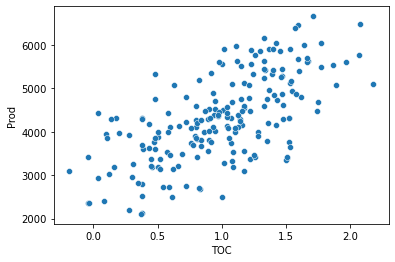

In [407]:
sns.scatterplot(x='TOC', y='Prod', data=data);


Наличие сильной мультиколлинеарности в данных, которая «портит» коэффициенты. 

### Задание 5.5

Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения, выше $0.7$. Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с объёмом добычи газа.

Также исключите из данных факторы, для которых корреляция с целевой переменной меньше $0.05$.

In [408]:
C

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
Well,1.000000,0.068927,0.077928,0.041483,-0.079252,0.022624,-0.007279,0.026817
Por,0.068927,1.000000,0.760546,-0.461549,-0.218570,0.711831,0.111860,0.861910
Perm,0.077928,0.760546,1.000000,-0.239636,-0.124017,0.471746,0.051023,0.727426
AI,0.041483,-0.461549,-0.239636,1.000000,0.127599,-0.531864,0.499143,-0.390835
Brittle,-0.079252,-0.218570,-0.124017,0.127599,1.000000,-0.214282,0.317929,0.237155
TOC,0.022624,0.711831,0.471746,-0.531864,-0.214282,1.000000,0.299483,0.654445
VR,-0.007279,0.111860,0.051023,0.499143,0.317929,0.299483,1.000000,0.323182
Prod,0.026817,0.861910,0.727426,-0.390835,0.237155,0.654445,0.323182,1.000000


2. Постройте линейную регрессию на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу NumPy.

In [438]:
X_droped = X.drop(columns = ['Well', 'Perm', 'TOC'])

A = np.column_stack((np.ones(200), X_droped))

w_hat = (np.linalg.inv(A.T@A)@A.T@y).round()

w_hat_df = pd.DataFrame(list(zip((['w_0'] + list(X_droped.columns)), w_hat)), 
                        columns = ['Feature', 'w_hat'])
w_hat_df[1:]


,Feature,w_hat
1,Por,293.0
2,AI,-200.0
3,Brittle,28.0
4,VR,517.0


In [440]:
data[list(X_droped.columns) + ['Prod']].corr().iloc[:-1, -1]

Por        0.861910
AI        -0.390835
Brittle    0.237155
VR         0.323182
Name: Prod, dtype: float64

3. Сделайте прогноз для всего обучающего набора данных и рассчитайте метрику MAPE (Mean Absolute Percentage Error). Результат приведите в процентах (не указывайте знак процента), округлив его до первого знака после точки-разделителя.

In [416]:
y_pred = A@w_hat

round(metrics.mean_absolute_percentage_error(y_pred, y)*100 , 1)

4.0